In [40]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as  transforms

from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [41]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784 # 28x28
num_classes = 10
epochs = 2
learning_rate = 0.01
batch_size = 32

In [42]:
train_dataset = torchvision.datasets.MNIST(root='./datasets/', 
                                           train=True, 
                                           transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./datasets/',
                                          train=False,
                                          transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)



In [43]:
examples = iter(train_loader)
samples, labels = examples._next_data()
print(samples.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


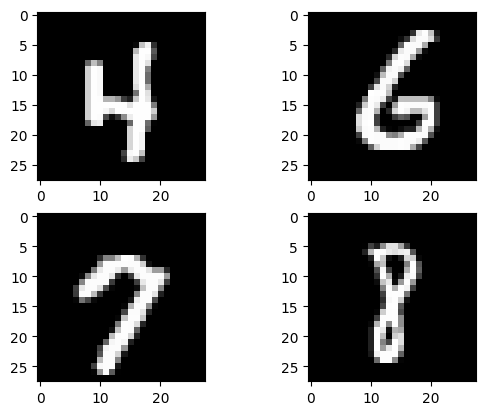

In [44]:
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()


In [49]:
class NN(nn.Module):
    def __init__(self, input_size: int, output_size: int, hidden_size: int) -> None:
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x: torch.Tensor):
        x = self.fc1(x)
        x = self.relu(x)
        output = self.fc2(x)
        return output
    
model = NN(input_size=input_size, output_size=num_classes, hidden_size=64)
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# train loop
total_steps = len(train_loader) 
for epoch in range(epochs):
    for idx, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backwards
        optimizer.zero_grad()
        loss.backward()
        
        # weight update
        optimizer.step()
        
        if (idx+1) % 100 == 0:
            print(f"epoch {epoch + 1} / {epochs}, step {idx+1} / {total_steps}, loss = {loss:.4f}")
            

with torch.no_grad():
    n_corrects = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0] 
        n_corrects += (predictions == labels).sum().item()
    
    acc = n_corrects / n_samples * 100.0
    print(f'accuracy = {acc:.2f}')


epoch 1 / 2, step 100 / 1875, loss = 0.2070
epoch 1 / 2, step 200 / 1875, loss = 0.1295
epoch 1 / 2, step 300 / 1875, loss = 0.3750
epoch 1 / 2, step 400 / 1875, loss = 0.3037
epoch 1 / 2, step 500 / 1875, loss = 0.1107
epoch 1 / 2, step 600 / 1875, loss = 0.1606
epoch 1 / 2, step 700 / 1875, loss = 0.2951
epoch 1 / 2, step 800 / 1875, loss = 0.1418
epoch 1 / 2, step 900 / 1875, loss = 0.0781
epoch 1 / 2, step 1000 / 1875, loss = 0.0561
epoch 1 / 2, step 1100 / 1875, loss = 0.2424
epoch 1 / 2, step 1200 / 1875, loss = 0.1640
epoch 1 / 2, step 1300 / 1875, loss = 0.2952
epoch 1 / 2, step 1400 / 1875, loss = 0.3512
epoch 1 / 2, step 1500 / 1875, loss = 0.1808
epoch 1 / 2, step 1600 / 1875, loss = 0.0847
epoch 1 / 2, step 1700 / 1875, loss = 0.1126
epoch 1 / 2, step 1800 / 1875, loss = 0.1109
epoch 2 / 2, step 100 / 1875, loss = 0.2055
epoch 2 / 2, step 200 / 1875, loss = 0.2196
epoch 2 / 2, step 300 / 1875, loss = 0.3050
epoch 2 / 2, step 400 / 1875, loss = 0.1394
epoch 2 / 2, step 500 /